# WeatherPy

---

In [1]:
#Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key



In [2]:
#pip install citipy

In [3]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generating the cities List by using citipy

In [4]:
#List for latitudes and longitudes
lat_lngs = []
cities = []

#Ranges of lat and lon
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#merge the lats and lngs lists into one list 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [12]:
cities
#try list
#cities2=[cities[0],cities[1],cities[2]]
#cities2

['adamstown',
 'puerto natales',
 'nola',
 'kodiak',
 'waitangi',
 'punta arenas',
 'port-aux-francais',
 'jamestown',
 'edinburgh of the seven seas',
 'invercargill',
 'petropavlovsk-kamchatsky',
 'enewetak',
 'puerto ayora',
 'port mathurin',
 'remire-montjoly',
 'klyuchi',
 'longyearbyen',
 'pachino',
 'albany',
 'sandnessjoen',
 'talnakh',
 'nogliki',
 'grytviken',
 'atafu village',
 'vanimo',
 'smithers',
 'bethel',
 'sellersburg',
 'san patricio',
 'blackmans bay',
 'katima mulilo',
 'rimouski',
 'kristiansund',
 'cabedelo',
 'arvika',
 'chinchilla',
 'bredasdorp',
 'dawei',
 'amahai',
 'porto novo',
 'ushuaia',
 'pisco',
 'tahe',
 'ciudad lazaro cardenas',
 'avarua',
 'trat',
 'el bauga',
 'pandan',
 'yellowknife',
 'ust-nera',
 'dampit',
 'huetamo de nunez',
 'taiohae',
 'margaret river',
 'wakkanai',
 "port saint john's",
 'saipan',
 'tolanaro',
 'mount pearl',
 'puerto aysen',
 'leiston',
 'nyurba',
 'alice springs',
 'kachug',
 'weno',
 'kourou',
 'east london',
 'stanley',


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [13]:
#Set api base URL and fill the list of the city_data
city_data = []

#lists for the data frame 
city_weather = []
city_lat = []
city_lng = []     
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

for i, x in enumerate(cities):
    endpoint = f'https://api.openweathermap.org/data/2.5/weather?q={x}&appid={weather_api_key}&units=metric'
    try:
        print(f"{i}. Processing city: {x}")
        city_weather = requests.get(endpoint).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat= city_weather['coord']['lat']
        city_lng= city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": x, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found. Skipping...")
        pass
    
    
# Indicate that Data Loading is complete 

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
0. Processing city: adamstown
1. Processing city: puerto natales
2. Processing city: nola
3. Processing city: kodiak
4. Processing city: waitangi
5. Processing city: punta arenas
6. Processing city: port-aux-francais
7. Processing city: jamestown
8. Processing city: edinburgh of the seven seas
9. Processing city: invercargill
10. Processing city: petropavlovsk-kamchatsky
11. Processing city: enewetak
12. Processing city: puerto ayora
13. Processing city: port mathurin
14. Processing city: remire-montjoly
15. Processing city: klyuchi
16. Processing city: longyearbyen
17. Processing city: pachino
18. Processing city: albany
19. Processing city: sandnessjoen
20. Processing city: talnakh
21. Processing city: nogliki
22. Processing city: grytviken
23. Processing city: atafu village
24. Processing city: vanimo
25. Processing city: smithers
26. Processing city: bethel
27. Processing city: sellersburg
28. Processing city: san patricio

245. Processing city: bijie
246. Processing city: xindi
247. Processing city: bulungu
248. Processing city: cumaribo
City not found. Skipping...
249. Processing city: zaozhuang
250. Processing city: jamaame
251. Processing city: ouarzazat
252. Processing city: port elizabeth
253. Processing city: knokke
254. Processing city: yonggwang-up
255. Processing city: utrik
256. Processing city: auki
257. Processing city: kapa'a
258. Processing city: chifeng
259. Processing city: cable beach
City not found. Skipping...
260. Processing city: hammerfest
261. Processing city: tynda
262. Processing city: ytyk-kyuyel'
City not found. Skipping...
263. Processing city: fuxin
264. Processing city: port-vila
265. Processing city: thunder bay
266. Processing city: jiaojiang
267. Processing city: cortez
268. Processing city: kerikeri
269. Processing city: valparaiso
270. Processing city: tura
271. Processing city: selfoss
272. Processing city: dumai
273. Processing city: kerema
274. Processing city: calam

493. Processing city: san pedro pochutla
494. Processing city: newnham
495. Processing city: charcas
496. Processing city: isla mujeres
497. Processing city: tual
498. Processing city: usinsk
499. Processing city: tindouf
500. Processing city: san andres
501. Processing city: hpa-an
502. Processing city: prado
503. Processing city: taoudenni
504. Processing city: puerto santa
505. Processing city: richards bay
506. Processing city: soure
507. Processing city: rayadrug
508. Processing city: goondiwindi
509. Processing city: hohhot
510. Processing city: sanctuary point
511. Processing city: rabo de peixe
512. Processing city: dubbo
513. Processing city: gaigeturi
514. Processing city: shitanjing
515. Processing city: coxim
516. Processing city: kokuy
517. Processing city: bereznik
518. Processing city: zuni pueblo
519. Processing city: cooper's town
520. Processing city: panaba
521. Processing city: colonia menno
522. Processing city: ujae
523. Processing city: nova sintra
524. Processin

In [14]:
#convert city_data to a Pandas data frame 

city_data_df = pd.DataFrame(city_data)

#Show the count 
city_data_df.count()
#city_weather

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [15]:
# Display sample data
city_data_df.head()
#city_data

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       adamstown -25.0660 -130.1015     22.38        78         100   
1  puerto natales -51.7236  -72.4875      7.31        72           9   
2            nola  40.9220   14.5329     17.57        85           2   
3          kodiak  57.7900 -152.4072      5.73        81         100   
4        waitangi -43.9535 -176.5597     15.46        93         100   

   Wind Speed Country        Date  
0        3.88      PN  1683408182  
1        3.78      CL  1683408182  
2        0.75      IT  1683408183  
3        3.09      US  1683408270  
4        1.79      NZ  1683408270

In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
#Read csv
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#data display
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0             adamstown -25.0660 -130.1015     22.38        78         100   
1        puerto natales -51.7236  -72.4875      7.31        72           9   
2                  nola  40.9220   14.5329     17.57        85           2   
3                kodiak  57.7900 -152.4072      5.73        81         100   
4              waitangi -43.9535 -176.5597     15.46        93         100   

         Wind Speed Country        Date  
City_ID                                  
0              3.88      PN  1683408182  
1              3.78      CL  1683408182  
2              0.75      IT  1683408183  
3              3.09      US  1683408270  
4              1.79      NZ  1683408270

# Scatter plots

## Latitude Vs Temperature

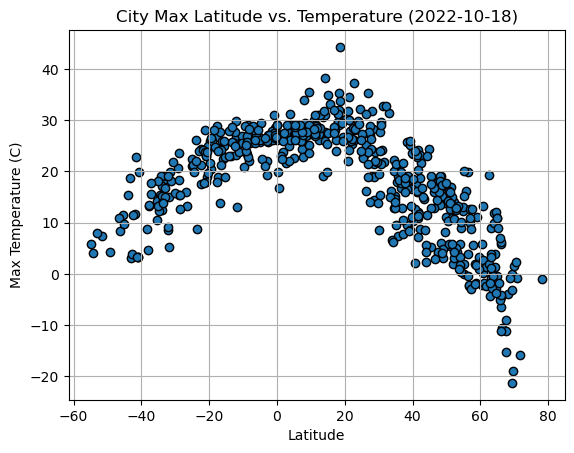

In [21]:
#scatter
x= city_data_df['Lat']
y= city_data_df['Max Temp']
plt.scatter(x,y, edgecolors='black')
#Format 
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

#save the figure
plt.savefig("output_data/Fig1.png")

plt.show()

## Latitude Vs. Humidity

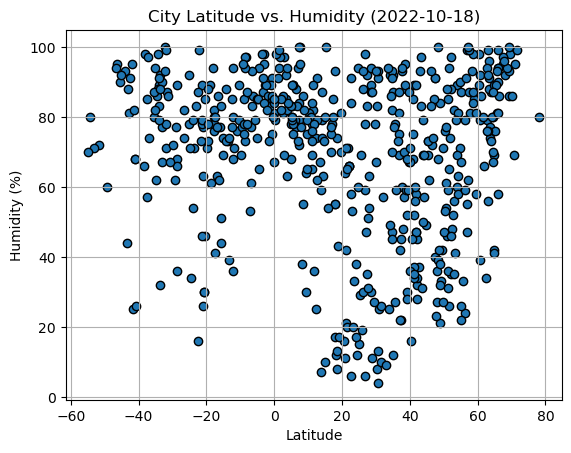

In [22]:
#scatter
y= city_data_df['Humidity']
plt.scatter(x,y, edgecolors='black')
#Format 
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#save the figure
plt.savefig("output_data/Fig2.png")


plt.show()

## Latitude Vs. Cloudiness

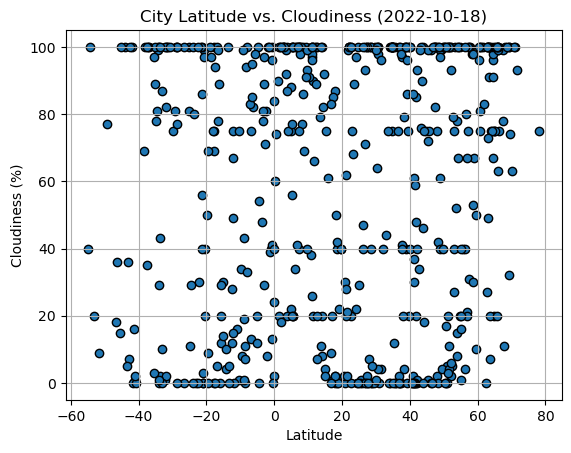

In [24]:
#scatter
y= city_data_df['Cloudiness']
plt.scatter(x,y, edgecolors='black')
#Format 
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#save the figure
plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed

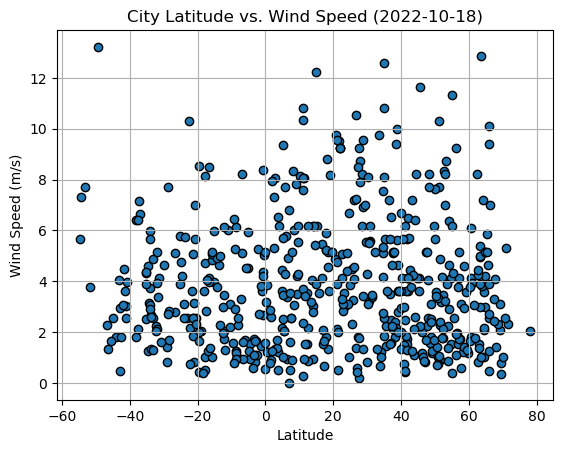

In [26]:
#scatter
y= city_data_df['Wind Speed']
plt.scatter(x,y, edgecolors='black')
#Format 
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

#save the figure
plt.savefig("output_data/Fig4.png")

plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

### Defining a function for the linear regresseion 

$$y = b_0 + b_1 * Latitude $$


In [34]:
#remane the lat column for plotting 
city_data_df = city_data_df.rename(columns={'Lat':'Latitude'})
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

City  Latitude       Lng  Max Temp  Humidity  \
City_ID                                                                     
2                            nola   40.9220   14.5329     17.57        85   
3                          kodiak   57.7900 -152.4072      5.73        81   
7                       jamestown   42.0970  -79.2353     18.80        45   
10       petropavlovsk-kamchatsky   53.0452  158.6483      4.33        56   
11                       enewetak   11.3474  162.3373     27.42        82   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
2                 2        0.75      IT  1683408183  
3               100        3.09      US  1683408270  
7                 0        3.60      US  1683407975  
10               40        7.00      RU  1683408273  
11               90        8.07      MH  1683408072

In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

City  Latitude       Lng  Max Temp  Humidity  \
City_ID                                                              
0                adamstown  -25.0660 -130.1015     22.38        78   
1           puerto natales  -51.7236  -72.4875      7.31        72   
4                 waitangi  -43.9535 -176.5597     15.46        93   
5             punta arenas  -53.1500  -70.9167      8.06        71   
6        port-aux-francais  -49.3500   70.2167      4.36        60   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        3.88      PN  1683408182  
1                 9        3.78      CL  1683408182  
4               100        1.79      NZ  1683408270  
5                20        7.72      CL  1683408271  
6                77       13.22      TF  1683408271

##  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8374533134021283


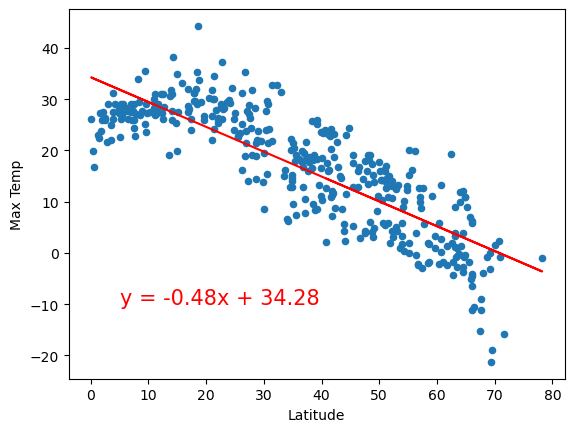

In [37]:
#Northern Hemisphere
#Lineal regression 
x=northern_hemi_df['Latitude']
y=northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x,y)

#Y value predictions
y_predict = intercept + (slope*x)

#Scatter 
northern_hemi_df.plot(kind='scatter',x='Latitude',y='Max Temp')
#add the line to the scatter
plt.plot(x,y_predict,color='r')
#add the ecuation 
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line, (5,-10), color = 'r', fontsize = 15)
#r-value
print(f'The r-value is: {rvalue}')

plt.show()


The r-value is: 0.8279227110108236


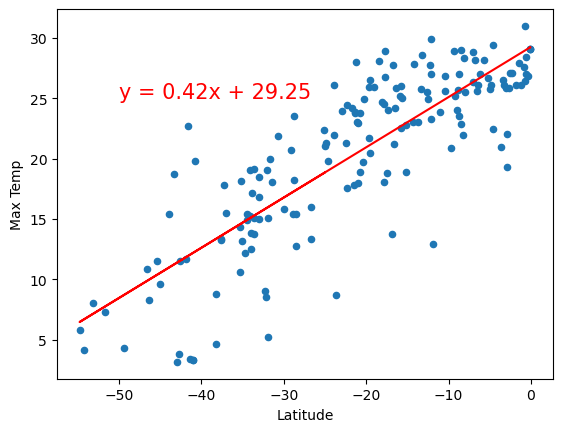

In [40]:
#Southern Hemisphere
#Lineal regression 
xs=southern_hemi_df['Latitude']
y=southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(xs,y)

#Y value predictions
y_predict = intercept + (slope*xs)

#Scatter 
southern_hemi_df.plot(kind='scatter',x='Latitude',y='Max Temp')
#add the line to the scatter
plt.plot(xs,y_predict,color='r')
#add the ecuation 
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line, (-50,25), color = 'r', fontsize = 15)
#r-value
print(f'The r-value is: {rvalue}')

plt.show()

### Discussion about the linear relationship: 
In the first plot, we can see that the two variables have a strong correlation because when the latitude increases the Max temperature decreases, and the r-value at -.83 confirms this strong negative correlation. In the second plot, we can observe a clear positive correlation between the variables because both variables increase together almost to simulate a "perfect correlation". In conclusion with the linear relationship we can expect that as the latitude is closer to 0, the Max Temperature will be higher 

## Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05089306361217108


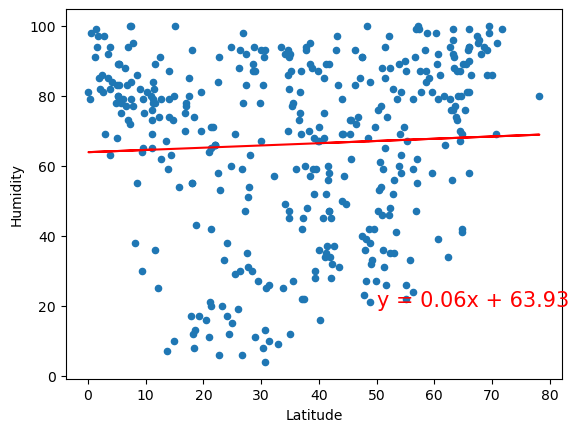

In [42]:
#Northern Hemisphere
#Lineal regression 
x=northern_hemi_df['Latitude']
y=northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x,y)

#Y value predictions
y_predict = intercept + (slope*x)

#Scatter 
northern_hemi_df.plot(kind='scatter',x='Latitude',y='Humidity')
#add the line to the scatter
plt.plot(x,y_predict,color='r')
#add the ecuation 
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line, (50,20), color = 'r', fontsize = 15)
#r-value
print(f'The r-value is: {rvalue}')

plt.show()


The r-value is: 0.08559177350530082


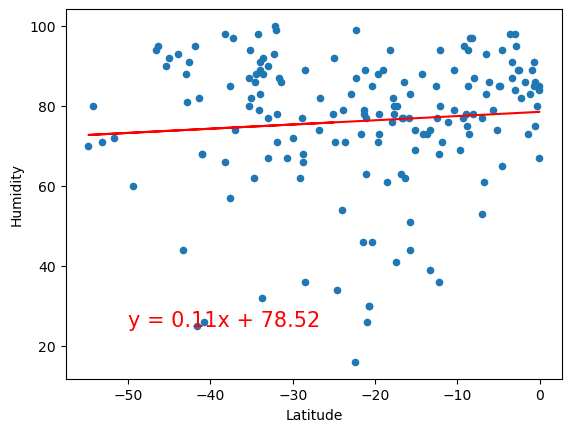

In [43]:
#Southern Hemisphere
#Lineal regression 
xs=southern_hemi_df['Latitude']
y=southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(xs,y)

#Y value predictions
y_predict = intercept + (slope*xs)

#Scatter 
southern_hemi_df.plot(kind='scatter',x='Latitude',y='Humidity')
#add the line to the scatter
plt.plot(xs,y_predict,color='r')
#add the ecuation 
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line, (-50,25), color = 'r', fontsize = 15)
#r-value
print(f'The r-value is: {rvalue}')

plt.show()

### Discussion about the linear relationship:
According to the r-values of the plots above, the correlation between the latitude and the humidity is poor as they both are near to 0. The linear regression does not help in the prediction of the humidity base on the change in latitude. In the plots, we can see that most of the cities have high levels of humidity but these levels do not depend on the latitude.

## Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03571140494733467


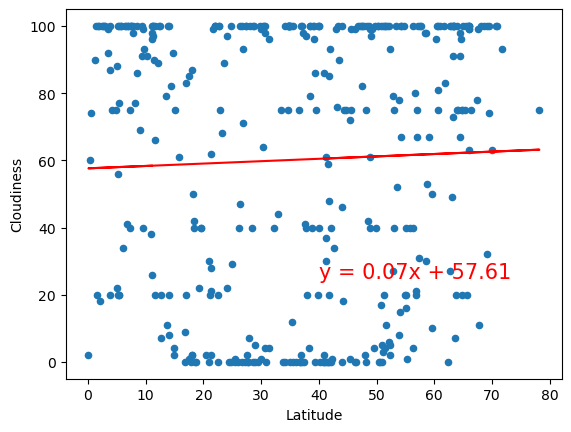

In [45]:
#Northern Hemisphere
#Lineal regression 
x=northern_hemi_df['Latitude']
y=northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x,y)

#Y value predictions
y_predict = intercept + (slope*x)

#Scatter 
northern_hemi_df.plot(kind='scatter',x='Latitude',y='Cloudiness')
#add the line to the scatter
plt.plot(x,y_predict,color='r')
#add the ecuation 
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line, (40,25), color = 'r', fontsize = 15)
#r-value
print(f'The r-value is: {rvalue}')

plt.show()


The r-value is: -0.031098872839129394


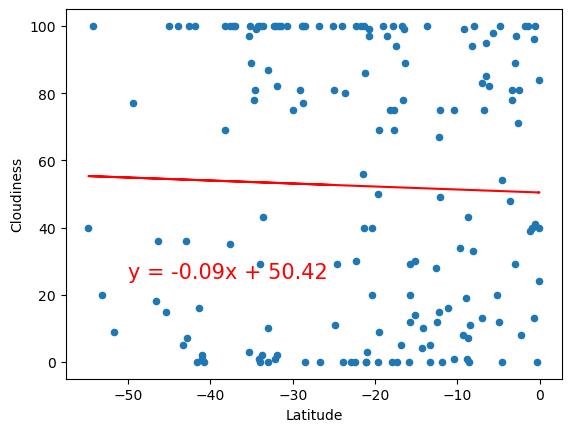

In [46]:
#Southern Hemisphere
#Lineal regression 
xs=southern_hemi_df['Latitude']
y=southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(xs,y)

#Y value predictions
y_predict = intercept + (slope*xs)

#Scatter 
southern_hemi_df.plot(kind='scatter',x='Latitude',y='Cloudiness')
#add the line to the scatter
plt.plot(xs,y_predict,color='r')
#add the ecuation 
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line, (-50,25), color = 'r', fontsize = 15)
#r-value
print(f'The r-value is: {rvalue}')

plt.show()

### Discussion about the linear relationship:
We can see that the slope in the line of both plots is almost 0 which indicates that they have a small change rate, this makes sense because the correlation coefficient is near to 0, so there is no relation between the variables and we can´t estimate the cloudiness of a city depending on the latitude of the city. The plots show that the city's percentage of cloudiness is concentrated at the edges, meaning the information looks like is biased towards 0% or 100%.

## Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10808658641504763


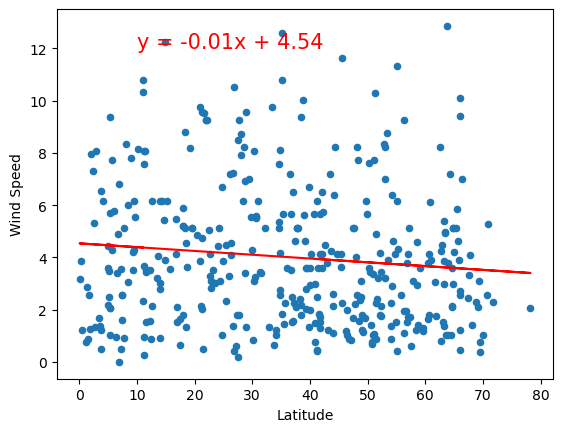

In [48]:
#Northern Hemisphere
#Lineal regression 
x=northern_hemi_df['Latitude']
y=northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x,y)

#Y value predictions
y_predict = intercept + (slope*x)

#Scatter 
northern_hemi_df.plot(kind='scatter',x='Latitude',y='Wind Speed')
#add the line to the scatter
plt.plot(x,y_predict,color='r')
#add the ecuation 
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line, (10,12), color = 'r', fontsize = 15)
#r-value
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: -0.16720303051887728


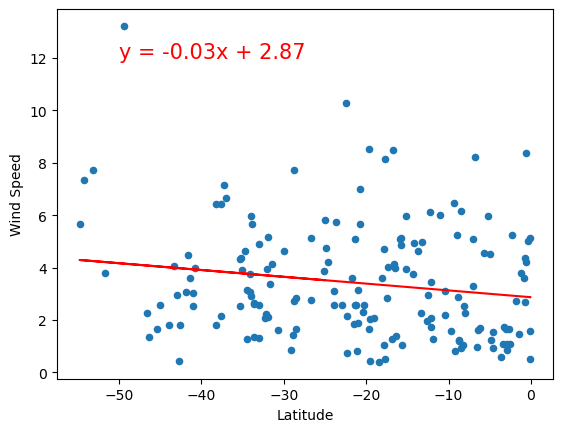

In [50]:
#Southern Hemisphere
#Lineal regression 
xs=southern_hemi_df['Latitude']
y=southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(xs,y)

#Y value predictions
y_predict = intercept + (slope*xs)

#Scatter 
southern_hemi_df.plot(kind='scatter',x='Latitude',y='Wind Speed')
#add the line to the scatter
plt.plot(xs,y_predict,color='r')
#add the ecuation 
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line, (-50,12), color = 'r', fontsize = 15)
#r-value
print(f'The r-value is: {rvalue}')

plt.show()

### Discussion about the linear relationship:
Even though the correlation between the wind speed and the latitude is greater than the latitude vs cloudiness and the humidity vs latitude, it is still very low. Doing a prediction on the wind speed based on the lineal regression wouldn´t be certain, in both plots the correlation is negative which means that if the latitude increases the wind speed may decrease, but as we see in the graph, there are no obvious visual signs that this is true. 